<a href="https://colab.research.google.com/github/PaulToronto/DataCamp-Track---Machine-Learning-Scientist-in-Python/blob/main/1_4_Supervised_Learning_with_scikit_learn_Preprocessing_and_Pipelines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1-4 Supervised Learning with scikit-learn - Preprocessing and Pipelines.

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier

In [2]:
plt.style.use('ggplot')

## Data

### Music

In [3]:
data_url = 'https://drive.google.com/uc?id=1z3a8JUWsMhSIYUIoe_ckDMaOkdDlFd5v '

music_df = pd.read_csv(data_url)
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [4]:
music_df.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,41.0,0.6440,0.823,236533.0,0.814,0.687000,0.1170,-5.611,0.1770,102.619000,0.649,Jazz
1,62.0,0.0855,0.686,154373.0,0.670,0.000000,0.1200,-7.626,0.2250,173.915000,0.636,Rap
2,42.0,0.2390,0.669,217778.0,0.736,0.000169,0.5980,-3.223,0.0602,145.061000,0.494,Electronic
3,64.0,0.0125,0.522,245960.0,0.923,0.017000,0.0854,-4.560,0.0539,120.406497,0.595,Rock
4,60.0,0.1210,0.780,229400.0,0.467,0.000134,0.3140,-6.645,0.2530,96.056000,0.312,Rap


## Preprocessing data

### scikit-learn requirements

- Numeric data
- No missing values

### Dealing with categorical features

- scikit-learn will not accept categorical features by default
- Need to convert categorical features into numeric variables
- Convert to binary features called **dummy variables**
  - 0: Observation was not that category
  - 1: Observation was that category

<img src="https://drive.google.com/uc?export=view&id=1P_HRPzlQHPDXmMuVONr2ZlGakgWQMVC1">

- We can actually delete the `Rock` column
- If we don't do this, we are duplicating information, which might be an issue for some models



### Music dataset

- `popularity`: Target variable
- `genre`: Categorical feature

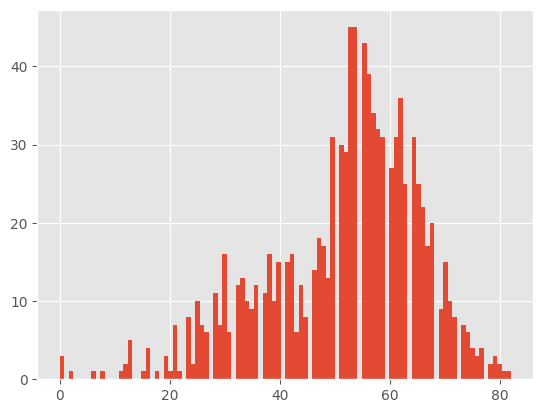

In [5]:
music_df['popularity'].hist(bins=100)
plt.show()

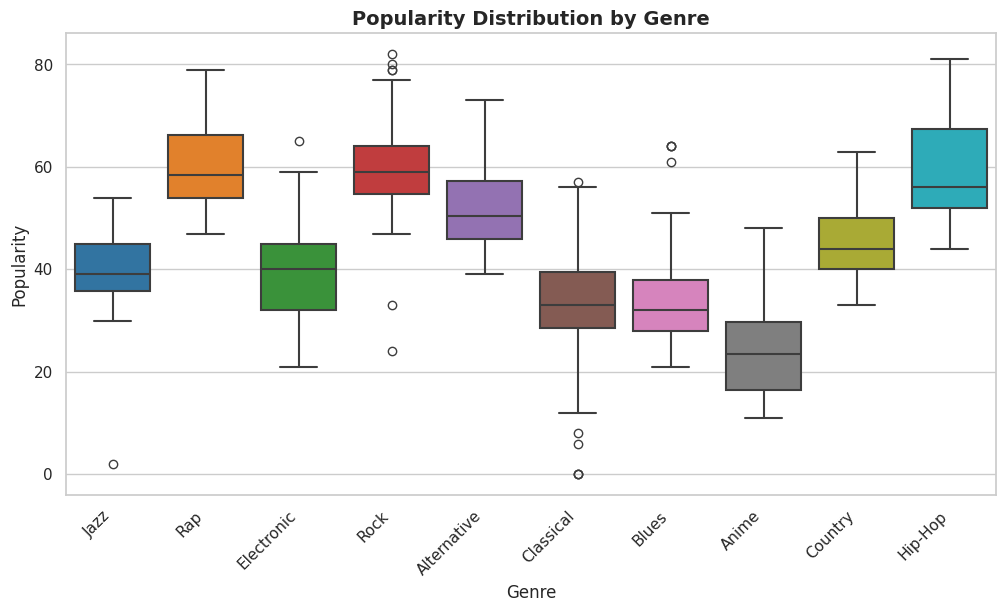

In [6]:
plt.figure(figsize=(12, 6))

sns.set_theme(style='whitegrid')
sns.boxplot(x='genre', y='popularity',
            data=music_df, linewidth=1.5,
            palette='tab10', hue='genre')

plt.title('Popularity Distribution by Genre', fontsize=14, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.xticks(rotation=45, ha="right")  # Rotate genre labels for readability

plt.show()

In [7]:
plt.style.use('ggplot')

#### `get_dummies` method 1

In [8]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre             1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [9]:
music_dummies = pd.get_dummies(music_df['genre'], drop_first=True)
music_dummies

,Anime,Blues,Classical,Country,Electronic,Hip-Hop,Jazz,Rap,Rock
0,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,True
996,False,False,False,False,True,False,False,False,False
997,False,False,False,False,False,False,False,True,False
998,False,False,False,False,False,False,False,False,True


In [10]:
music_dummies = pd.concat([music_df, music_dummies], axis=1)
music_dummies = music_dummies.drop('genre', axis=1)
music_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  Anime             1000 non-null   bool   
 12  Blues             1000 non-null   bool   
 13  Classical         1000 non-null   bool   
 14  Country           1000 non-null   bool   
 15  Electronic        1000 non-null   bool   
 16  Hip-Hop           1000 non-null   bool   
 

#### `get_dummies` method 2

- This method only works if there is only one categorical feature

In [11]:
music_dummies = pd.get_dummies(music_df, drop_first=True)
music_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        1000 non-null   float64
 1   acousticness      1000 non-null   float64
 2   danceability      1000 non-null   float64
 3   duration_ms       1000 non-null   float64
 4   energy            1000 non-null   float64
 5   instrumentalness  1000 non-null   float64
 6   liveness          1000 non-null   float64
 7   loudness          1000 non-null   float64
 8   speechiness       1000 non-null   float64
 9   tempo             1000 non-null   float64
 10  valence           1000 non-null   float64
 11  genre_Anime       1000 non-null   bool   
 12  genre_Blues       1000 non-null   bool   
 13  genre_Classical   1000 non-null   bool   
 14  genre_Country     1000 non-null   bool   
 15  genre_Electronic  1000 non-null   bool   
 16  genre_Hip-Hop     1000 non-null   bool   
 

### Linear Regression with dummy variables

In [12]:
X = music_dummies.drop('popularity', axis=1)
y = music_dummies['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [13]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
linreg = LinearRegression()
linreg

LinearRegression()

In [14]:
# sklearn's cross-validation metrics presume a higher score is better,
#. so MSE is changed to negative to counteract this.
linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf,
                            scoring='neg_mean_squared_error')
linreg_cv

array([-66.55181079, -74.49718851, -56.5918095 , -74.31436161,
       -62.62031494])

In [15]:
# We can calculate the training RMSE by taking
#. the square root and converting to positive
np.sqrt(-linreg_cv)

array([8.15792932, 8.63117538, 7.52275279, 8.6205778 , 7.91329988])

### Ridge regression with dummy variables

In [16]:
X = music_dummies.drop('popularity', axis=1)
y = music_dummies['popularity']

In [17]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

ridge = Ridge(alpha=0.2)
ridge

Ridge(alpha=0.2)

In [18]:
scores = cross_val_score(ridge, X, y, cv=kf, scoring="neg_mean_squared_error")
scores

array([-68.49467657, -56.64985721, -70.89015472, -64.1558722 ,
       -80.14086371])

In [19]:
rmse = np.sqrt(-scores)
rmse

array([8.27615107, 7.52660994, 8.41962913, 8.00973609, 8.95214297])

In [20]:
# average rmse
np.mean(rmse)

8.236853840202299

In [21]:
# standard deviatio of the target array
np.std(y)

14.021569099070199

An average RMSE of approximately 8.24 is lower than the standard deviation of the target variable (song popularity), suggesting the model is reasonably accurate.

## Handling Missing Data

In [22]:
data_url = 'https://drive.google.com/uc?id=1uYCIurRVJuw1PZb0OTHn5Z5Fwgh_E6lq'
music_df2 = pd.read_csv(data_url)
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        969 non-null    float64
 1   acousticness      800 non-null    float64
 2   danceability      857 non-null    float64
 3   duration_ms       909 non-null    float64
 4   energy            800 non-null    float64
 5   instrumentalness  909 non-null    float64
 6   liveness          954 non-null    float64
 7   loudness          956 non-null    float64
 8   speechiness       941 non-null    float64
 9   tempo             954 non-null    float64
 10  valence           857 non-null    float64
 11  genre             992 non-null    object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [23]:
print(music_df2.isna().sum().sort_values())

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64


### Deleting rows

It is common practice to remove missing observations accounting for less than 5% of all data.

In [24]:
print(music_df2.isna().sum().sort_values() * 100 / len(music_df2))

genre                0.8
popularity           3.1
loudness             4.4
liveness             4.6
tempo                4.6
speechiness          5.9
duration_ms          9.1
instrumentalness     9.1
danceability        14.3
valence             14.3
acousticness        20.0
energy              20.0
dtype: float64


In [25]:
music_df2 = music_df2.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 1 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        892 non-null    float64
 1   acousticness      714 non-null    float64
 2   danceability      765 non-null    float64
 3   duration_ms       863 non-null    float64
 4   energy            714 non-null    float64
 5   instrumentalness  863 non-null    float64
 6   liveness          892 non-null    float64
 7   loudness          892 non-null    float64
 8   speechiness       839 non-null    float64
 9   tempo             892 non-null    float64
 10  valence           765 non-null    float64
 11  genre             892 non-null    object 
dtypes: float64(11), object(1)
memory usage: 90.6+ KB


In [26]:
print(music_df2.isna().sum().sort_values())

popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64


### Imputing values

- **Imputation**: use domain knowledge to replace missing data with educated guesses
- Common to use the mean
- Can also use the median or another value
- For categorical values, we tupicall use the most frequent value (the mode)
- Must split our data first to avoid **data leakage**
- Data leakage is what happens when test set information is leaked to our model

In [27]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1uYCIurRVJuw1PZb0OTHn5Z5Fwgh_E6lq'
music_df2 = pd.read_csv(data_url)
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        969 non-null    float64
 1   acousticness      800 non-null    float64
 2   danceability      857 non-null    float64
 3   duration_ms       909 non-null    float64
 4   energy            800 non-null    float64
 5   instrumentalness  909 non-null    float64
 6   liveness          954 non-null    float64
 7   loudness          956 non-null    float64
 8   speechiness       941 non-null    float64
 9   tempo             954 non-null    float64
 10  valence           857 non-null    float64
 11  genre             992 non-null    object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [28]:
print(music_df2.isna().sum().sort_values())

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64


In [29]:
X_cat = music_df2[['genre']]
X_num = music_df2.drop(['genre', 'popularity'], axis=1)
y = music_df2['popularity']

In [30]:
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=12)
X_train_cat.shape, X_test_cat.shape, y_train.shape, y_test.shape

((800, 1), (200, 1), (800,), (200,))

In [31]:
X_train_num, X_test_num, _, _ = train_test_split(X_num, y, test_size=0.2, random_state=12)
X_train_num.shape, X_test_num.shape

((800, 10), (200, 10))

In [32]:
imp_cat = SimpleImputer(strategy='most_frequent')
X_train_cat_array = imp_cat.fit_transform(X_train_cat) # not, fit_transform
X_test_cat_array = imp_cat.transform(X_test_cat) # note, transform only on test set

In [33]:
imp_num = SimpleImputer() # default strategy is 'mean'
X_train_num_array = imp_num.fit_transform(X_train_num)
X_test_num_array = imp_num.transform(X_test_num)

In [34]:
type(X_train_cat_array), type(X_test_cat_array), type(X_train_num_array), type(X_test_num_array)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [35]:
X_train_num = pd.DataFrame(X_train_num_array,
                           columns=imp_num.get_feature_names_out(),
                           index=X_train_num.index)
X_train_cat = pd.DataFrame(X_train_cat_array,
                           columns=imp_cat.get_feature_names_out(),
                           index=X_train_cat.index)
X_test_num = pd.DataFrame(X_test_num_array,
                          columns=imp_num.get_feature_names_out(),
                          index=X_test_num.index)
X_test_cat = pd.DataFrame(X_test_cat_array,
                          columns=imp_cat.get_feature_names_out(),
                          index=X_test_cat.index)

In [36]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

In [37]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 11), (200, 11), (800,), (200,))

### Imputing with a pipeline



In [38]:
# start fresh
data_url = 'https://drive.google.com/uc?id=1uYCIurRVJuw1PZb0OTHn5Z5Fwgh_E6lq'
music_df2 = pd.read_csv(data_url)
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        969 non-null    float64
 1   acousticness      800 non-null    float64
 2   danceability      857 non-null    float64
 3   duration_ms       909 non-null    float64
 4   energy            800 non-null    float64
 5   instrumentalness  909 non-null    float64
 6   liveness          954 non-null    float64
 7   loudness          956 non-null    float64
 8   speechiness       941 non-null    float64
 9   tempo             954 non-null    float64
 10  valence           857 non-null    float64
 11  genre             992 non-null    object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [39]:
print(music_df2.isna().sum().sort_values())

genre                 8
popularity           31
loudness             44
liveness             46
tempo                46
speechiness          59
duration_ms          91
instrumentalness     91
danceability        143
valence             143
acousticness        200
energy              200
dtype: int64


### Drop missing data

In [40]:
music_df2 = music_df2.dropna(subset=['genre', 'popularity', 'loudness', 'liveness', 'tempo'])
print(music_df2.isna().sum().sort_values())

popularity            0
liveness              0
loudness              0
tempo                 0
genre                 0
duration_ms          29
instrumentalness     29
speechiness          53
danceability        127
valence             127
acousticness        178
energy              178
dtype: int64


In [41]:
music_df2['genre'].value_counts()

,count
genre,
Rock,446
Blues,57
Hip-Hop,55
Jazz,54
Rap,52
Alternative,49
Country,48
Electronic,47
Classical,43


### Convert `genre` to a binary feature

In [42]:
music_df2['genre'] = np.where(music_df2['genre'] == 'Rock', 1, 0)
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 1 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        892 non-null    float64
 1   acousticness      714 non-null    float64
 2   danceability      765 non-null    float64
 3   duration_ms       863 non-null    float64
 4   energy            714 non-null    float64
 5   instrumentalness  863 non-null    float64
 6   liveness          892 non-null    float64
 7   loudness          892 non-null    float64
 8   speechiness       839 non-null    float64
 9   tempo             892 non-null    float64
 10  valence           765 non-null    float64
 11  genre             892 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 90.6 KB


In [43]:
music_df2['genre'].value_counts()

,count
genre,
0,446
1,446


### Pipeline for song genre prediction

In [44]:
imputer = SimpleImputer()

knn = KNeighborsClassifier(n_neighbors=3)

# pipeline steps
steps = [('imputer', imputer),
         ('knn', knn)]

In [45]:
pipeline = Pipeline(steps)
pipeline

Pipeline(steps=[('imputer', SimpleImputer()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [46]:
music_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 1 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        892 non-null    float64
 1   acousticness      714 non-null    float64
 2   danceability      765 non-null    float64
 3   duration_ms       863 non-null    float64
 4   energy            714 non-null    float64
 5   instrumentalness  863 non-null    float64
 6   liveness          892 non-null    float64
 7   loudness          892 non-null    float64
 8   speechiness       839 non-null    float64
 9   tempo             892 non-null    float64
 10  valence           765 non-null    float64
 11  genre             892 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 90.6 KB
